# Soft Business function

In [1]:
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
#import tensorflow
#import keras
import wordcloud
import nltk
import inspect
import re
import unicodedata

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import RSLPStemmer #Stemmer for portugese words.

from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a customized confusion matrix
    
    Input:
        cm: confusion matrix generated from sklearn's method confusion_matrix(set, predictions)
        classes: target labels to be plotted
        title: title
        cmap: matrix color
    Output:
        None
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Plot configuration
    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
#os.chdir("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/")
os.chdir("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\")
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce'

In [5]:
order_items=pd.read_csv('olist_order_items_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
ordenes = pd.read_csv('olist_orders_dataset.csv')
orders=pd.read_csv('data_tratada_v_nao.csv')
print(orders.shape)
print(customers.shape)
print(ordenes.shape)
print(order_items.shape)
print(list(orders.columns))
print(list(customers.columns))
print(list(ordenes.columns))
print(list(order_items.columns))

(41753, 8)
(99441, 5)
(99441, 8)
(112650, 7)
['Unnamed: 0', 'review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [6]:
cols_orders = ['review_id','review_score','order_id','review_comment_message']
orders = orders[cols_orders]
list(orders.columns)

['review_id', 'review_score', 'order_id', 'review_comment_message']

In [7]:
cols_ordenes_it = ['order_id','price','freight_value']
order_items = order_items[cols_ordenes_it]
list(order_items.columns)

['order_id', 'price', 'freight_value']

In [8]:
cols_ordenes = ['order_id','customer_id']
ordenes = ordenes[cols_ordenes]
list(ordenes.columns)

['order_id', 'customer_id']

In [9]:
cols_cust = ['customer_id','customer_unique_id']
customers = customers[cols_cust]
list(customers.columns)

['customer_id', 'customer_unique_id']

In [10]:
# Joining order and items datasets
orders_items_1 = orders.merge(order_items, on='order_id', how='left')
orders_items   = orders_items_1.drop_duplicates(keep='last',subset=['order_id','review_id'])
#valor_orden = orders_items['order_id','review_comment_message','price','freight_value']
print(orders_items.shape)

(41753, 6)


In [11]:
# Joining order and items datasets
orders_items_cust_1 = orders_items.merge(ordenes, on='order_id', how='left')
orders_items_cust   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id'])
#valor_orden = orders_items['order_id','review_comment_message','price','freight_value']
print(orders_items_cust.shape)

(41753, 7)


In [12]:
# Joining order and items datasets
orders_items_cust_1     = orders_items_cust.merge(customers, on='customer_id', how='left')
orders_items_customer   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id','customer_unique_id'])
print(orders_items_customer.shape)

(41753, 8)


In [13]:
vezes=orders_items_customer['customer_unique_id'].value_counts().rename_axis('customer_unique_id').reset_index(name='counts')
#vezes

In [14]:
# Times a client buys
orders_items_cust_1     = orders_items_customer.merge(vezes, on='customer_unique_id', how='left')
orders_items_customer   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id','customer_unique_id'])
print(orders_items_customer.shape)

(41753, 9)


In [15]:
####### ACA SE CREA EL BOW
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(orders_items_customer.review_comment_message).toarray()
X = pd.DataFrame(X_tfidf, columns = list(vectorizer.get_feature_names()))

In [16]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(X)

In [17]:
# Creating the class label
bin_edges = [0, 2, 5]
bin_names = ['0', '1']
orders_items_customer['class'] = pd.cut(orders_items_customer['review_score'] , bins=bin_edges, labels=bin_names)
#orders = orders.iloc[:, np.r_[0, 1, 3, 4, 2, 5,6]
y = orders_items_customer['class'].values
Y_tf = y.astype(int)
#Y_tf

In [18]:
# load the model from disk
filename='finalized_model_pca.sav'
pca = pickle.load(open(filename, 'rb'))

In [19]:
X_val_pca=pca.transform(X_std)
X_val_mod=pd.DataFrame(X_val_pca)

In [20]:
## Variables

vars_gb = 245
vars_rf = 20
vars_lr = 2849

In [21]:
#df1 = df[[vars_usar]]
X_GB = X_val_mod.iloc[:,0:vars_gb]
X_RF = X_val_mod.iloc[:,0:vars_rf]
X_LR = X_val_mod.iloc[:,0:vars_lr]

## Boosting

In [22]:
# load the model from disk
filename='finalized_model_pca_gb.sav'
gb_model = pickle.load(open(filename, 'rb'))
gb_roc_auc=roc_auc_score(Y_tf, gb_model.predict(X_GB))
gb_roc_auc

0.8674900720951692

## Random Forest

In [23]:
# load the model from disk
filename='finalized_model_pca_rf.sav'
rf_model = pickle.load(open(filename, 'rb'))
rf_roc_auc=roc_auc_score(Y_tf, rf_model.predict(X_RF))
rf_roc_auc

0.8119984830826976

## Logistic Regression

In [24]:
# load the model from disk
filename='finalized_model_pca_lr.sav'
lr_model = pickle.load(open(filename, 'rb'))
rf_roc_auc=roc_auc_score(Y_tf, lr_model.predict(X_LR))
rf_roc_auc

0.8724502908580312

# Constantes de la funcion

## Make predictions

In [25]:
gb_pred = pd.DataFrame(gb_model.predict(X_GB), columns = ['pred_gb'])
rf_pred = pd.DataFrame(rf_model.predict(X_RF), columns = ['pred_rf'])
lr_pred = pd.DataFrame(lr_model.predict(X_LR), columns = ['pred_lr'])

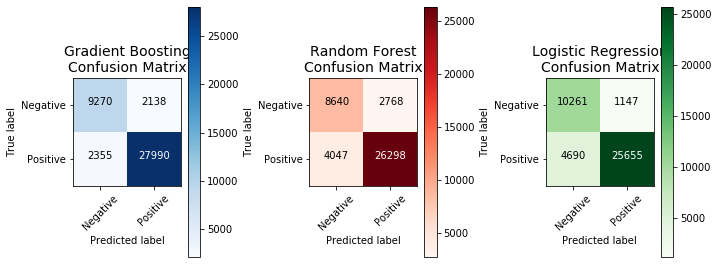

In [26]:
# Confusion matrix
gb_cm = confusion_matrix(Y_tf, gb_pred)
rf_cm = confusion_matrix(Y_tf, rf_pred)
lr_cm = confusion_matrix(Y_tf, lr_pred)

# Plotting
fig = plt.figure(figsize=(10, 4))
classes = ['Negative','Positive']
plt.subplot(131)
plot_confusion_matrix(gb_cm, classes, title='Gradient Boosting\nConfusion Matrix')
plt.subplot(132)
plot_confusion_matrix(rf_cm, classes, cmap=plt.cm.Reds, title='Random Forest\nConfusion Matrix')
plt.subplot(133)
plot_confusion_matrix(lr_cm, classes, cmap=plt.cm.Greens, title='Logistic Regression\nConfusion Matrix')

plt.tight_layout()
plt.show()

## Price e mu

In [27]:
orders_items_customer['valor']=orders_items_customer['price']+orders_items_customer['freight_value']
orders_items_customer['p_n']=orders_items_customer['valor']/max(orders_items_customer['valor'])

orders_items_customer['mu_hi']  = orders_items_customer['p_n'].apply(lambda x: 0.5+0.5*x  if x<=0.5  else 0.75+0.25*x)
orders_items_customer['mu_low'] = orders_items_customer['p_n'].apply(lambda x: 0.4+0.5*x  if x<=0.5  else 0.65+0.25*x)


orders_items_customer['mu_high_counts'] = orders_items_customer['mu_hi']  * orders_items_customer['counts']
orders_items_customer['mu_low_counts']  = orders_items_customer['mu_low'] * orders_items_customer['counts']

In [28]:
cost = orders_items_customer[['mu_high_counts','mu_low_counts']]

In [29]:
yt=pd.DataFrame(Y_tf.transpose(), columns=['Y_real'])

frames = [yt,gb_pred,rf_pred,lr_pred,cost]
#result = pd.concat(frames)
costo_pca=pd.concat(frames,axis=1)

In [30]:
costo_pca.to_csv("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\costo_pca.csv")


## Costo autom.

In [31]:
def costo_d(x):
    if x['Y_real']==x['pred_gb'] and x['pred_gb']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_gb'] and x['pred_gb']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_gb']==0:
        return 0.01

In [32]:
d = costo_pca.apply(costo_d, axis=1)
a = costo_pca.apply(costo_a, axis=1)
b = costo_pca.apply(costo_b, axis=1)

In [33]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_GB=A+B-D
print(f'Soft Function PCA_GB='+str(round(Costo_GB,2)))

Soft Function PCA_GB=-2714.01


## Validación LR

In [36]:
def costo_d(x):
    if x['Y_real']==x['pred_lr'] and x['pred_lr']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_lr'] and x['pred_lr']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_lr']==0:
        return 0.01

In [37]:
d = costo_pca.apply(costo_d, axis=1)
a = costo_pca.apply(costo_a, axis=1)
b = costo_pca.apply(costo_b, axis=1)

In [39]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_LR=A+B-D
print(f'Soft Function PCA_LR='+str(round(Costo_LR,2)))

Soft Function PCA_LR=-3635.29


## Validación RF

In [37]:
def costo_d(x):
    if x['Y_real']==x['pred_rf'] and x['pred_rf']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_rf'] and x['pred_rf']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_rf']==0:
        return 0.01

In [38]:
d = costo_pca.apply(costo_d, axis=1)
a = costo_pca.apply(costo_a, axis=1)
b = costo_pca.apply(costo_b, axis=1)

In [40]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_RF=A+B-D
print(f'Soft Function PCA_RF='+str(round(Costo_RF,2)))

Soft Function PCA_RF=-1094.54


## Sin modelo

In [40]:
def costo_sm(x):
    if x['Y_real']==0:
        return x['mu_high_counts']

In [41]:
sm = costo_pca.apply(costo_sm, axis=1)

In [43]:
SM = sm.sum()
print(f'Soft Function Without model='+str(round(SM,2)))

Soft Function Without model=5945.27
